## LOB Cukit Revenue Prediction

__Import Libraries/Packages__

In [1]:
import numpy as np
import pandas as pd

__Load Dataset__

In [2]:
rev = pd.read_csv("data/SKU Sold Detail.csv")
rev.head()

,BU_ID,Country,Region,Quarter,SKU_NUMBER,SKU_AGE,Category,Revenue,Margin
0,11,United States,AMER,FY22Q3,020K1,3,BATTERY,99.99,86.40
1,11,United States,AMER,FY22Q3,06PX9,9,ACCESSORIES,NaN,NaN
2,11,United States,AMER,FY22Q3,0WF28,8,BATTERY,NaN,NaN
3,11,United States,AMER,FY22Q3,1P6KD,7,BATTERY,25413.54,24746.22
4,11,United States,AMER,FY22Q3,1V2F6,8,BATTERY,281.57,237.47


__Data Manipulation/Data Cleaning__

In [3]:
rev['Revenue'] = rev['Revenue'].replace(" ",np.nan)
rev = rev[rev['Revenue'].notnull()]
rev = rev.reset_index()[rev.columns]
rev['Revenue'] = rev['Revenue'].astype(float)

In [4]:
# Change Revenue to Categorical column
revMean = rev['Revenue'].mean()
revMedian = rev['Revenue'].median()

def revenue(rev):
    if (rev["Revenue"] < revMean) :
        return "Revenue < Mean"
    else:return "Revenue > Mean"
rev["Revenue_Rng"] = rev.apply(lambda rev:revenue(rev), axis = 1)

In [5]:
# using dropna() function  
rev = rev.dropna()

#csv
rev = pd.DataFrame(rev)
rev.to_csv('data/rev.csv',index=False)

#Removing unnecessary columns 
rev.drop(['Region','Quarter','SKU_NUMBER','Margin'], axis = 1, inplace = True)

In [6]:
#Separating catagorical and numerical columns
Id_col     = ['Country']
target_col = ["Revenue_Rng"]
cat_cols   = rev.nunique()[rev.nunique() < 50].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in rev.columns if x not in cat_cols + target_col + Id_col]

In [7]:
#labels
lab = rev["Revenue_Rng"].value_counts().keys().tolist()
#values
val = rev["Revenue_Rng"].value_counts().values.tolist()

In [14]:
#visualization
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as py

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  ['#7FFD4','#89CFF0','#00FFFF'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Cuskit SKU Revenue",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [9]:
revenue = rev.nlargest(n=50, columns=['Revenue'])
revenue.head(5)

,BU_ID,Country,SKU_AGE,Category,Revenue,Revenue_Rng
9846,11,United States,2,KEYBOARD,8204847.82,Revenue > Mean
9848,11,United States,2,KEYBOARD,6131129.62,Revenue > Mean
4471,11,United States,2,KEYBOARD,5247954.42,Revenue > Mean
9842,11,United States,3,KEYBOARD,4417208.78,Revenue > Mean
4473,11,United States,2,KEYBOARD,4307805.30,Revenue > Mean


In [17]:
#Separating range of Revenue
meanRev = revenue[revenue["Revenue_Rng"] == "Revenue < Mean"]
topRev = revenue[revenue["Revenue_Rng"] == "Revenue > Mean"]

In [39]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = meanRev[column].value_counts().values.tolist(),
                    labels  = meanRev[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Revenue < Mean",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .3
                   )
    trace2 = go.Pie(values  = topRev[column].value_counts().values.tolist(),
                    labels  = topRev[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.52,1]),
                    name    = "Revenue > Mean",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .3
                   )
    layout = go.Layout(dict(title = column + " Revenue Range ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Revenue < Mean",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Revenue > Mean",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5)
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)



#function  for histogram for revenue range
def histogram(column) :
    trace1 = go.Histogram(x  = meanRev[column],
                          histnorm= "percent",
                          name = "Revenue < Mean",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = topRev[column],
                          histnorm = "percent",
                          name = "Revenue > Mean",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " LOB Cuskit Revenue Range ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)


In [25]:
rev.isnull().any()

BU_ID          False
Country        False
SKU_AGE        False
Category       False
Revenue        False
Revenue_Rng    False
dtype: bool

In [26]:
revenue.head()

,BU_ID,Country,SKU_AGE,Category,Revenue,Revenue_Rng
9846,11,United States,2,KEYBOARD,8204847.82,Revenue > Mean
9848,11,United States,2,KEYBOARD,6131129.62,Revenue > Mean
4471,11,United States,2,KEYBOARD,5247954.42,Revenue > Mean
9842,11,United States,3,KEYBOARD,4417208.78,Revenue > Mean
4473,11,United States,2,KEYBOARD,4307805.30,Revenue > Mean


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#BU col
Id_col     = ['BU_ID']
#Target columns
target_col = ['Revenue_Rng']
#categorical columns
cat_cols   = ['Country','Category']
#numerical columns
num_cols   = [x for x in rev.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = rev.nunique()[rev.nunique() <= 3].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols ]

In [28]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    rev[i] = le.fit_transform(rev[i])
    
#Duplicating columns for multi value columns
rev = pd.get_dummies(data = rev,columns = multi_cols)

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(rev[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
rev_copy = rev.copy()
rev = rev.drop(columns = num_cols, axis = 1)
rev = rev.merge(scaled,left_index=True,right_index=True,how = "left")

In [29]:
summary = (rev_copy[[i for i in rev_copy.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [30]:
#correlation
correlation = rev.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [31]:
#separating binary columns
bi_cs = rev.nunique()[rev.nunique() <= 2].keys()
dat_rad = rev[bi_cs]

#plotting radar chart for revenue range (binary variables)
def plot_radar(df,aggregate,title) :
    data_frame = df[df["Revenue_Rng"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns  = ["feature","yes"]
    data_frame_x["no"]    = data_frame.shape[0]  - data_frame_x["yes"]
    data_frame_x  = data_frame_x[data_frame_x["feature"] != "Revenue_Rng"]
    
    #count of 1's(yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #count of 0's(No)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    
    trace3 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor  = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title,height = 700))
    
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

#plot
plot_radar(dat_rad,1,"Median Revenue")
plot_radar(dat_rad,0,"Mean Revenue")

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 
train,test = train_test_split(rev,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in rev.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

In [33]:
def rev_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Mean Revenue","Median Revenue"],
                        y = ["Mean Revenue","Median Revenue"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3454
           1       0.96      0.98      0.97       426

    accuracy                           0.99      3880
   macro avg       0.98      0.99      0.98      3880
weighted avg       0.99      0.99      0.99      3880

Accuracy   Score :  0.9935567010309279
Area under curve :  0.9891783629784886 



C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

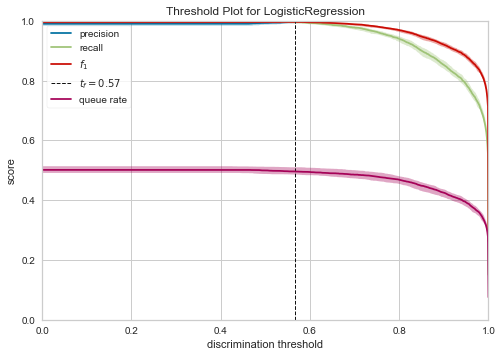

In [34]:
#visualization
import plotly.tools as tls
from imblearn.over_sampling import SMOTE

cols    = [i for i in rev.columns if i not in Id_col+target_col]

smote_X = rev[cols]
smote_Y = rev[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,test_size = .25,random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_resample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
###

logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

rev_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

In [36]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#select columns
cols = [i for i in rev.columns if i not in Id_col + target_col ]

#dataframe with non negative values
df_x = rev_copy[cols]
df_y = rev_copy[target_col]

#fit model with k= 3
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(df_x,df_y)

#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)


#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

#plot
trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

scores
[9.82727207e-02 9.82343525e-01 1.57560857e+01 5.58658104e+00
 1.09650550e+02 1.85286861e+01 5.57804633e+00 5.05301631e+01
 1.08701625e+01 1.04854926e+01 2.01762369e+01 7.09984673e+00
 3.43959684e+00 5.77001976e-01 8.84534609e-02 8.20500919e+00
 1.14950787e+00 1.12244113e-02 1.62896395e+00 1.09863402e+01
 4.68134997e+00 4.60995591e+00 1.31716331e+01 1.48558846e+01
 1.40970539e+01 6.04937535e+00 5.73884318e+00 5.86483890e+00
 1.24289563e+01 6.09239169e+00 1.17330898e+00 1.10911768e+01
 4.14490040e+00 1.79032136e+00 3.07029144e+00 1.39419061e+01
 6.99223350e-01 1.05518411e+01 5.60851342e+00 1.59562522e+01
 1.95556949e+01 1.18126322e+01 9.28936163e-01 6.32924111e-01
 5.96084851e+02 8.45325954e+00 6.70620871e+01 7.68061902e-02
 3.48758037e+01 3.96657713e+01 2.91631408e-01 1.40004264e+01
 4.59803147e-01 3.44852360e-01 1.14950787e+00 2.98786129e+01
 1.40309970e+01 4.86080741e+02 1.81023314e+01 1.83921259e+00
 1.67520664e+00 1.14950787e-01 5.95289687e+01 5.04173602e+01
 8.69937500e+00 5

DecisionTreeClassifier(criterion='entropy', max_depth=3)

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      3454
           1       0.68      0.03      0.06       426

    accuracy                           0.89      3880
   macro avg       0.79      0.51      0.50      3880
weighted avg       0.87      0.89      0.85      3880

Accuracy   Score :  0.8920103092783506
Area under curve :  0.5143896577690424 



C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



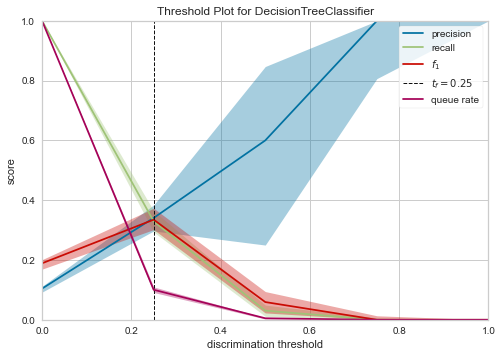

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

#top 3 categorical features
features_cat  = score[score["feature_type"] == "Categorical"]["features"][:3].tolist()

#top 3 numerical features
features_num  = score[score["feature_type"] == "Numerical"]["features"][:3].tolist()


#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    #separating dependent and in dependent variables
    dtc_x = df_x[columns]
    dtc_y = df_y[target_col]
    
    #model
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dtc_x,dtc_y)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Revenue < Mean","Revenue > Median"],
                                        filled = True                         
                                       )
                  )
    
    #model performance
    if model_performance == True :
        rev_prediction(dt_classifier,
                                 dtc_x,test_X[columns],
                                 dtc_y,test_Y,
                                 columns,"features",threshold_plot = True)
    
plot_decision_tree(features_num,3,"gini","best")
plot_decision_tree(features_cat,3,"entropy","best",
                   model_performance = True ,)

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_jobs=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      3454
           1       0.61      0.79      0.69       426

    accuracy                           0.92      3880
   macro avg       0.79      0.86      0.82      3880
weighted avg       0.93      0.92      0.93      3880

Accuracy Score   :  0.9208762886597938
Area under curve :  0.8619243933005483


C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

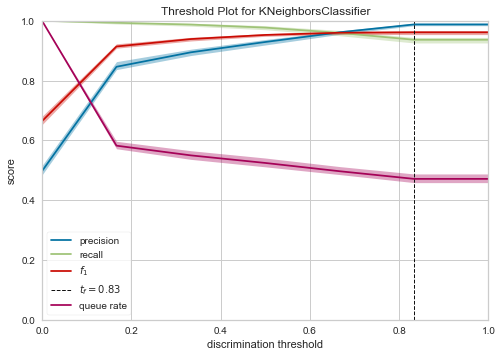

In [38]:
def rev_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Mean Revenue","Median Revenue"],
                        y = ["Mean Revenue","Median Revenue"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
rev_prediction_alg(knn,os_smote_X,test_X,
                             os_smote_Y,test_Y,threshold_plot = True)

C:\Users\wooi_ling_chin\AppData\Local\Temp\ipykernel_15564\2088358721.py:26: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\AppData\Local\Temp\ipykernel_15564\2951062724.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(criterion='entropy', max_depth=3)

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      3454
           1       0.00      0.00      0.00       426

    accuracy                           0.89      3880
   macro avg       0.45      0.50      0.47      3880
weighted avg       0.79      0.89      0.84      3880

Accuracy   Score :  0.8902061855670103
Area under curve :  0.5 



C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plot

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\yellowbrick\classifier\threshold.py:340: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\yellowbrick\classifier\threshold.py:340: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\yellowbrick\classifier\threshold.py:340: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\yellowbrick\classifier\threshold.py:340: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\yellowbrick\classifier\threshold.py:340: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\yellowbrick\classifier\threshold.py:340: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\yellowbrick\classifier\threshold.py:340: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\yellowbrick\classifier\threshold.py:340: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

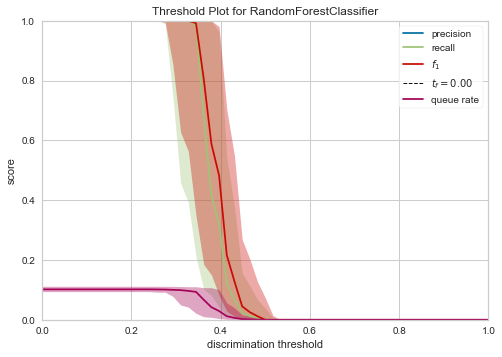

In [40]:
from sklearn.ensemble import RandomForestClassifier

#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model

def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    dataframe = rev_copy[columns + target_col].copy()
    
    #train and test datasets
    rf_x     = dataframe[[i for i in columns if i not in target_col]]
    rf_y     = dataframe[target_col]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Mean Revenue","Median Revenue"],
                            filled = True))
    
    #model performance
    if model_performance == True :
        rev_prediction(rfc,
                       rf_x,test_X[columns],
                       rf_y,test_Y,
                       columns,"features",threshold_plot = True)
        

cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
plot_tree_randomforest(cols1,100,99,3,"entropy",True)

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.30      0.46      3454
           1       0.14      0.94      0.25       426

    accuracy                           0.37      3880
   macro avg       0.56      0.62      0.36      3880
weighted avg       0.89      0.37      0.44      3880

Accuracy Score   :  0.3729381443298969
Area under curve :  0.6231048712658115


C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

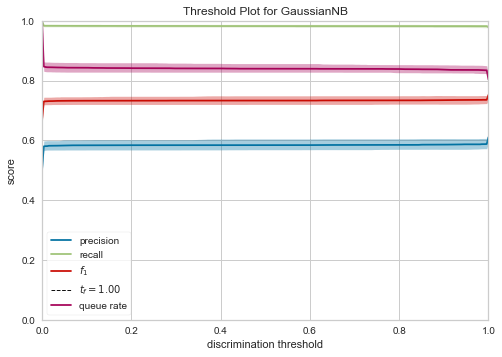

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

rev_prediction_alg(gnb,os_smote_X,test_X,os_smote_Y,test_Y)

In [42]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = [i for i in rev.columns if i not in Id_col + target_col]
rev_prediction(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = False)

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(gamma=1.0, kernel='linear', probability=True)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3454
           1       0.93      1.00      0.96       426

    accuracy                           0.99      3880
   macro avg       0.96      0.99      0.98      3880
weighted avg       0.99      0.99      0.99      3880

Accuracy   Score :  0.9912371134020619
Area under curve :  0.9930202717948301 



C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [53]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
#visualization
import plotly.figure_factory as ff

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression")
model2 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")
model3 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")
model4 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier Linear")

#concat all models
model_performances = pd.concat([model1,model2,model3,model4],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [54]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,x = model_performances[metric],orientation = "h",
                    name = metric ,marker = dict(line = dict(width =.7),color = color))
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "metric",zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)', zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

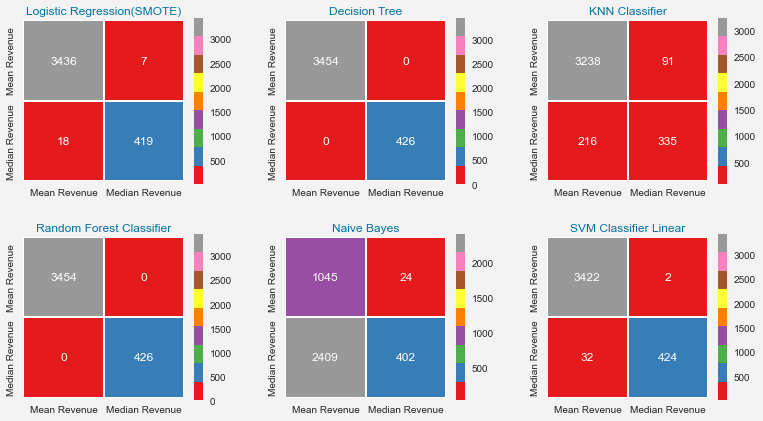

In [45]:
import itertools
#visualization
import seaborn as sns

lst    = [logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(SMOTE)','Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_Y)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["Mean Revenue","Median Revenue"],
                yticklabels=["Mean Revenue","Median Revenue"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

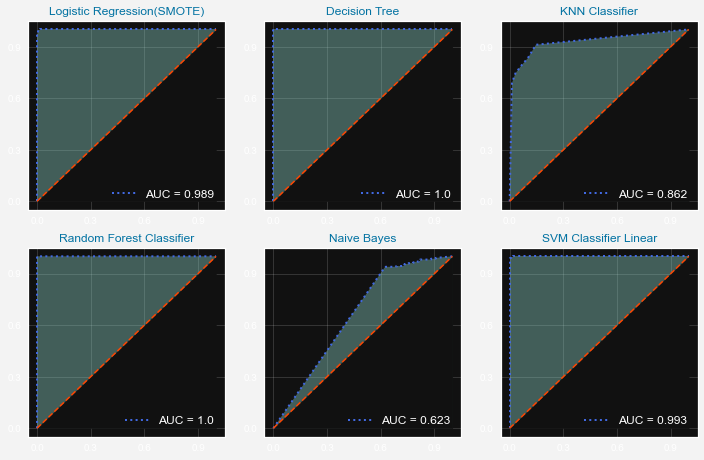

In [46]:
lst    = [logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(SMOTE)','Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(test_Y,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

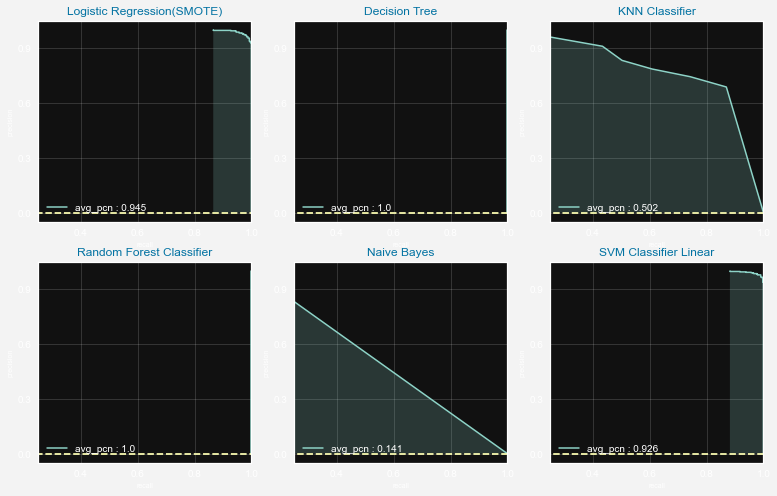

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    recall,precision,thresholds = precision_recall_curve(test_Y,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(test_Y,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))